No handles with labels found to put in legend.


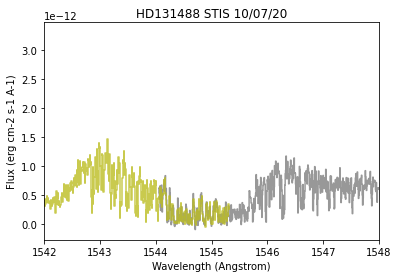

In [108]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as pl
import seaborn as sb4
import math
import numpy as np 
from astropy.io import fits
from scipy import interpolate 
import scipy 
import sys
from scipy.ndimage import gaussian_filter1d
from astropy import constants as const
import pylab as plb
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import convolve_fft
from astropy.convolution.kernels import CustomKernel
from astropy.convolution import convolve


file=['oe4v09020_x1d.fits']
date=['FUV']
colors=['royalblue']
pl.figure()
for i in np.arange(len(file)):
    x1ddata = fits.getdata(file[i], ext=1)
    norders = len(x1ddata)
    nwavs = len((x1ddata[0]['WAVELENGTH']))
    order = np.arange(norders)
    wave = x1ddata[:]['WAVELENGTH']
    flux = x1ddata[:]['FLUX']
    err = x1ddata[:]['ERROR']

    for j in range(norders):
        pl.plot(wave[j,:], flux[j,:], drawstyle='steps-mid', alpha=0.8)
    pl.title('HD131488 STIS 10/07/20')
    pl.xlabel('Wavelength (Angstrom)') 
    pl.ylabel('Flux (erg cm-2 s-1 A-1)')
    pl.xlim(1542,1548)
    pl.legend(frameon=False)
pl.show()

W = (wave[18])
min = 1542.3
max = 1544
wavelength = []
indx1 = []
for j, item in enumerate(W):
    if (item > min).any() and (item < max).any():
        wavelength.append(item)
        indx1.append(j)   
y = indx1
F = (flux[18])
Flux = np.take(F, indx1)
l = np.array(wavelength)
for i in (l):
    observed_lambda = (l*(1e-10))

error = (err[18])
yerr = np.take(error,indx1)

Lambda = np.arange(1542.3e-10, 1544e-10, 1e-14)       
h = 6.62607004*10**-34
k = 1.38e-23
c = 299792458.0
k = 1.38e-23
m = 1.9944235e-26
    

def absorption_model(lambda0_1, lambda0_2, lambda0_3, T, N):
    def model(lambda0, A21, g2, g1, N, E1, g1i, g2i, g3i, E1i, E2i, E3i, T):
        energy = []
        E = [E1i, E2i, E3i]
        E = np.array(E)
        gi = [g1i, g2i, g3i]
        gi = np.array(gi)
        kT = ((k*T)/(h*3e10))*1e11
        for j in (E):
            energy.append(np.exp(-j/(kT)))
        e = np.multiply(energy,gi)
        Z = np.sum(e)
        x = (g1i/Z)*(np.exp(-E1i/kT))
        v0 = c/lambda0
        v1 = (c/Lambda)
        for i in (v1):
            diffv = (v0/c)*(math.sqrt((2*k*T)/m))
            d1= ((diffv)**2)
            q1 = (v1-v0)**2
            a1 = -(q1/d1)
            L = 1/(diffv*(math.sqrt(np.pi)))*(np.exp(a1))
        B1 = (2*h*v0**3)/((c)**2)
        B12 = (A21*(g2/g1))/B1
        Depth = ((h*v0)/(4*math.pi))*x*B12*L
        X = -(Depth*N)
        I = 1e-12*(np.exp(X))
        return(I)
    I1 = model(lambda0_1, 5.9e08, 5, 5, N, 18031.427, 9, 11, 5, 46320.823, 47345.845, 18031.427, T)
    I2 = model(lambda0_2, 3e06, 9, 9, N, 46320.832, 9, 11, 5, 46320.823, 47345.845, 18031.427, T)
    I3 = model(lambda0_3, 4.6e07, 11, 13, N, 47345.845, 9, 11, 5, 46320.823, 47345.845, 18031.427, T)

    base = np.zeros(17001)
    model = np.add(base, I1- 1e-12)
    model = np.add(model, I2 - 1e-12)
    model = np.add(model, I3 - 1e-12)
    model = model + Bkg_continuum
    return(model)
    
    
model1 = absorption_model(1542.598e-10, 1542.9755e-10 , 1543.270e-10, 300, 1e20)


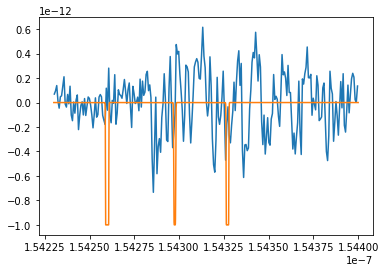

In [111]:
z = np.polyfit(observed_lambda, Flux, 3)
poly = np.poly1d(z)
new_y = poly(observed_lambda)
final_y = Flux - new_y
plt.plot(observed_lambda, final_y)

W = (wave[18])
min = 1542.3
max = 1544
wavelength = []
indx1 = []
for j, item in enumerate(W):
    if (item > min).any() and (item < max).any():
        wavelength.append(item)
        indx1.append(j)   
F = (flux[18])
Flux = np.take(F, indx1)
l = np.array(wavelength)
for i in (l):
    observed_lambda = (l*(1e-10))

plt.plot(Lambda, model1 - 1e-12)



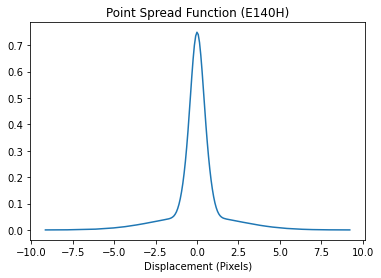

int 1201


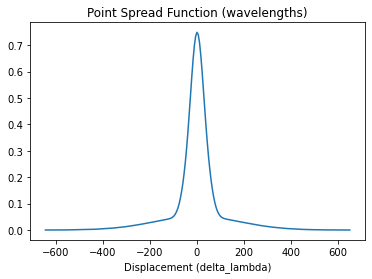

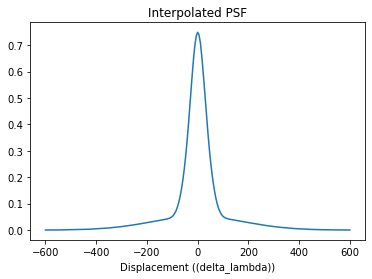

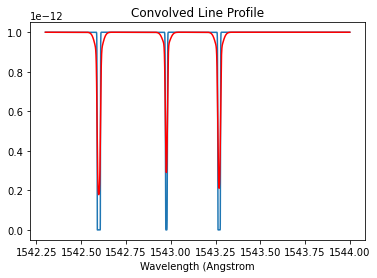

In [92]:
import pylab as plb
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import convolve_fft
from astropy.convolution.kernels import CustomKernel
from astropy.convolution import convolve

pixel_location, spectral_response = [], []
for line in open('PSF.txt', 'r'):
  values = [float(s) for s in line.split()]
  pixel_location.append(values[0])
  spectral_response.append(values[2])

pixel_location = np.array(pixel_location)
spectral = np.array(spectral_response)
plt.plot(pixel_location, spectral)
plt.title('Point Spread Function (E140H)')
plt.xlabel('Displacement (Pixels)')
plt.ylabel('')
plt.show()

for i in (pixel_location):
    p_location = ((pixel_location*(7.04e-13))/(1e-14))
int_pixel_locations= np.arange(-600,601,1)
print('int', len(int_pixel_locations))
plt.plot(p_location, spectral)
plt.title('Point Spread Function (wavelengths)')
plt.xlabel('Displacement (delta_lambda)')
plt.ylabel('')
plt.show()
interpol_function = scipy.interpolate.interp1d(p_location, spectral)
interpolated_spectral_response = interpol_function(int_pixel_locations)

plt.plot(int_pixel_locations, interpolated_spectral_response)
plt.title('Interpolated PSF')
plt.xlabel('Displacement ((delta_lambda))')
plt.ylabel('')
plt.show()

kernel = CustomKernel(interpolated_spectral_response) 
Bkg_continuum = 1e-12
convolved = convolve_fft(model1 - Bkg_continuum, kernel, normalize_kernel = True) + Bkg_continuum
plt.plot(Lambda*1e10, model1)
plt.plot(Lambda*1e10,convolved, 'r')
plt.title('Convolved Line Profile')
plt.xlabel('Wavelength (Angstrom')
plt.show()

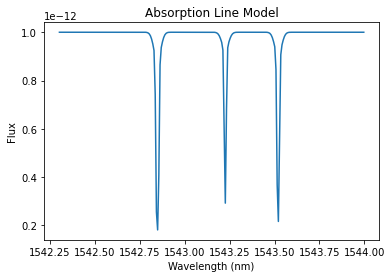

In [117]:
y = Lambda+25e-12
interpol_function = scipy.interpolate.interp1d(y*1e10, convolved, fill_value="extrapolate")
polated = interpol_function(l)
plt.plot(l,polated)
plt.title('Absorption Line Model')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux')
plt.show()

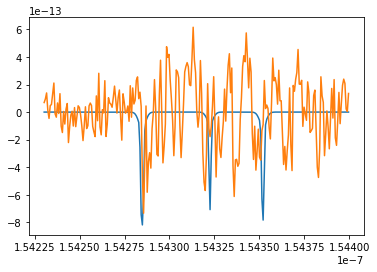

In [118]:
plt.plot(observed_lambda,polated-1e-12)
plt.plot(observed_lambda, final_y)

In [100]:
def log_likelihood(theta, observed_lambda, Flux, yerr):
    Rad_V, T, N = theta
    Bkg_continuum = 1.35e-12
    convolved = convolve_fft(absorption_model(1613.37599e-10, 1613.80343e-10, 1614.50683e-10, T, N) - Bkg_continuum, kernel, normalize_kernel = True) + Bkg_continuum
    lambda0 = [1613.37599e-10, 1613.80343e-10, 1614.50683e-10]
    
    Rad_V = (2.5e-12/1613.37599e-10)*c
    interpol_function = scipy.interpolate.interp1d(Lambda, convolved)
    model = interpol_function(observed_lambda)
    sigma2 = yerr ** 2 
    return -0.5 * np.sum((Flux - model) ** 2 / sigma2 + np.log(sigma2))


In [ ]:
from scipy.optimize import minimize
import numpy as np

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([100, 300, 10e22])+ 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(observed_lambda, Flux, yerr))
Rad_V_ml, T_ml, N_ml = soln.x 

print("Maximum likelihood estimates:")
print("Rad_V_ml = {0:.3f}".format(Rad_V_ml))
print("T = {0:.3f}".format(T_ml))
print("N = {0:.3f}".format(N_ml))

In [21]:
def log_prior(theta):    
    Rad_V, T, N = theta
    if -30 < Rad_V < 30 and  1 < T < 500 and 1e19 < N < 1e23:
        return 0
    return -np.inf

def log_probability(theta, observed_lambda, Flux, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, observed_lambda, Flux, yerr)


In [22]:
import emcee

pos = soln.x + np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(observed_lambda, Flux, yerr))
sampler.run_mcmc(pos, 50, progress=True, skip_initial_state_check=True);

  0%|          | 0/50 [00:00<?, ?it/s]C:\Users\Aoife\anaconda3\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 50/50 [00:00<00:00, 1041.62it/s]


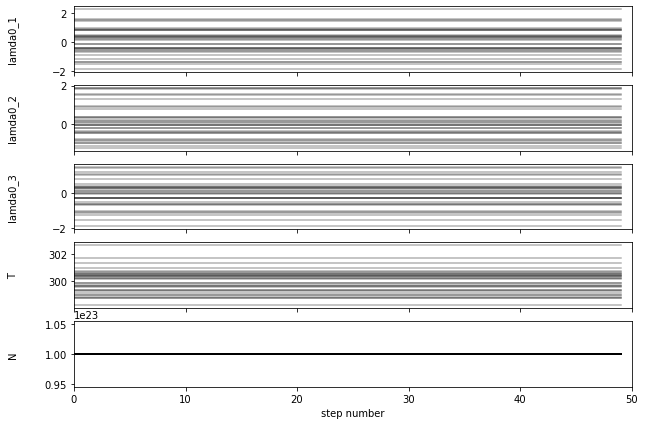

In [23]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["Rad_V", "T", "N"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
tau = sampler.get_autocorr_time()
print(tau)


In [ ]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

In [ ]:
import corner

fig = corner.corner(
    flat_samples, labels=labels
);